# Magnetic Dipole Calculations
## Self-Consistent Method

The loop is:

1. Impose an external field
$\mathbf{B} = B_x \mathbf{\hat{x}} + B_y \mathbf{\hat{y}} + B_z \mathbf{\hat{z}}$.
2. Generate the positions of each rare earth atom in the BTA assemblies:
knowing that in a single monomer those positions are $(x, y, z) = (0,r,0)$,
$\left(\frac{\sqrt{3}r}{2}, \frac{r}{\sqrt{2}}, 0\right)$, and
$\left(-\frac{\sqrt{3}r}{2}, \frac{r}{\sqrt{2}}, 0\right)$ where $r = 2.25$ nm,
that the stacking distance between monomers is $d$ = 0.35 nm, and that there is
a helicity of 10˚ rotation per layer, which for the i<sup>th</sup> atom of the
j<sup>th</sup> layer is:

$$ \begin{bmatrix}
    x' \\
    y' \\
    z'
\end{bmatrix}_{i,j}
=
\begin{bmatrix}
    \cos j\theta  & -\sin j\theta & 1  \\
    \sin j\theta  & \cos j\theta & 1  \\
    0             & 0 & 1 &
\end{bmatrix}
\begin{bmatrix}
    x  \\
    y \\
    z + j d
\end{bmatrix}_{i,j} $$

3. Calculate each local dipole moment using either a Curie-Law or Brillouin
function (at T = 298 K the difference is negligible) giving and array of
$\mathbf{m} = m_x \mathbf{\hat{x}} + m_y \mathbf{\hat{y}} + m_z \mathbf{\hat{z}}$.

4. At each atomic site, calculate the dipolar field due to all other moments in
the assembly using
$$\mathbf{B}(\mathbf{r}) = \frac{\mu_0}{4\pi} \left[\frac{3 \mathbf{m}
    (\mathbf{m} \cdot \mathbf{\hat{r}} ) } {r^5} - \frac{\mathbf{m}} {r^3}\right] $$
which is the magnetic field at a point in space due to a magnetic dipole,
resulting in a matrix
$\mathbf{B_{dip}} = B_{dip, x} \mathbf{\hat{x}} + B_{dip, y} \mathbf{\hat{y}} + B_{dip, y} \mathbf{\hat{z}}$

5. At each atomic site sum the external and dipole fields $B_{total} =  B_{ext} + B_{dip}$
6. Calculate a new moment m_new at each site using the local $B_{total}$
7. Calculate the mean L2 norm for the difference between the updated and old moment vectors at each site
$$ \lVert m \rVert_2 = \frac{1}{N_{atoms}} \sum (m_{new} - m_{old})^2 \rightarrow 0 $$

8. Repeat 3 – 7 with updated total field and moments until $ \lVert m \rVert_2 \leq$ threshold


### To do:
1. Change functions to accept dictionaries or unwrap \*\*kwargs instead.

### Atomic Positions

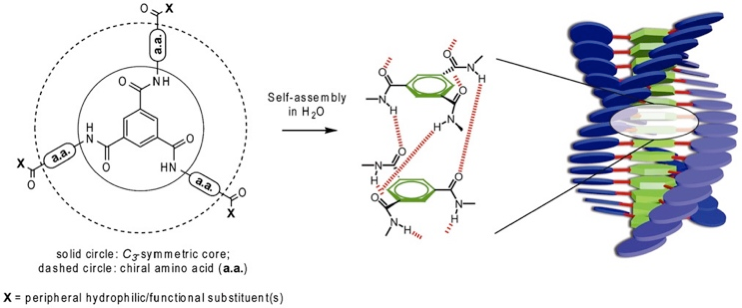

Import useful modules and functions; set some Jupyter settings

In [1]:
#%matplotlib inline
%matplotlib notebook
%config InlineBackend.figure_format ='retina'
%config IPCompleter.greedy=True
from self_consistent import *


Calculation for B parallel and perpendicular to the fibre

In [2]:
Bmag = 2.0 # magnetic field
NN = 20 # number of monomers
T = 298.0 # Temperature K

# Calculate B parallel to fibre assembly
p,m1_z,Bdip_z,Mag_z,Ut_z,vol = main_calc(Bmag, theta=0, phi = 0, NN=NN, T = T, print_res = True)

# Calculate B perpendicular to fibre assembly
p,m1_x,Bdip_x,Mag_x,Ut_x,vol = main_calc(Bmag, theta=90, phi = 0, NN=NN, T = T, print_res = True)

Bn_z = np.linalg.norm(Bdip_z, ord=2, axis=1)
Bn_x = np.linalg.norm(Bdip_x, ord=2, axis=1)

rel_dM = (np.linalg.norm(Mag_z) - np.linalg.norm(Mag_x))*100/np.linalg.norm(Mag_z)

rel_dU = (Ut_x - Ut_z)*100/Ut_z

print(f'dM = {rel_dM:.2f}%, dU = {rel_dU:.2f}%')

Applied Field:
 [x	 y	 z] T 
 [0. 0. 2.]
### Self-consistent calculation completed in 6 loops ###
dM error is 8.50e-20
M = 595.1 (A/m) 	 <Bdip> = 2.55 (mT)
-39.91 J/mol/assem -2.00 J/mol/mono 20 monomers 7.00 nm 

Applied Field:
 [x	 y	 z] T 
 [2.0000000e+00 0.0000000e+00 1.2246468e-16]
### Self-consistent calculation completed in 6 loops ###
dM error is 7.37e-20
M = 594.8 (A/m) 	 <Bdip> = 2.21 (mT)
-39.88 J/mol/assem -1.99 J/mol/mono 20 monomers 7.00 nm 

dM = 0.04%, dU = -0.09%


Plot Magnetic Moments

M_Bext_z_20_monomers


<IPython.core.display.Javascript object>


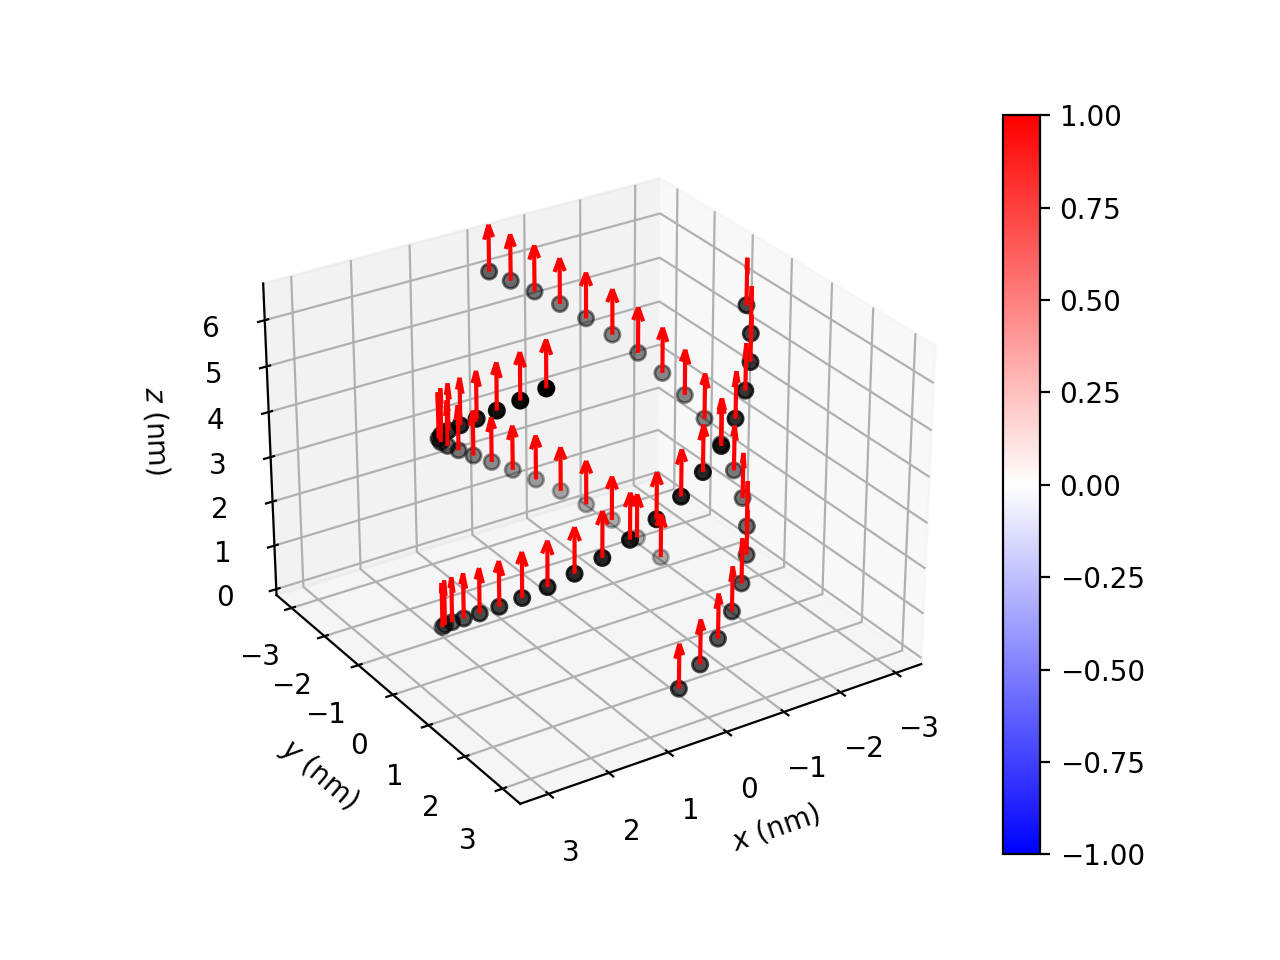

M_Bext_x_20_monomers


<IPython.core.display.Javascript object>


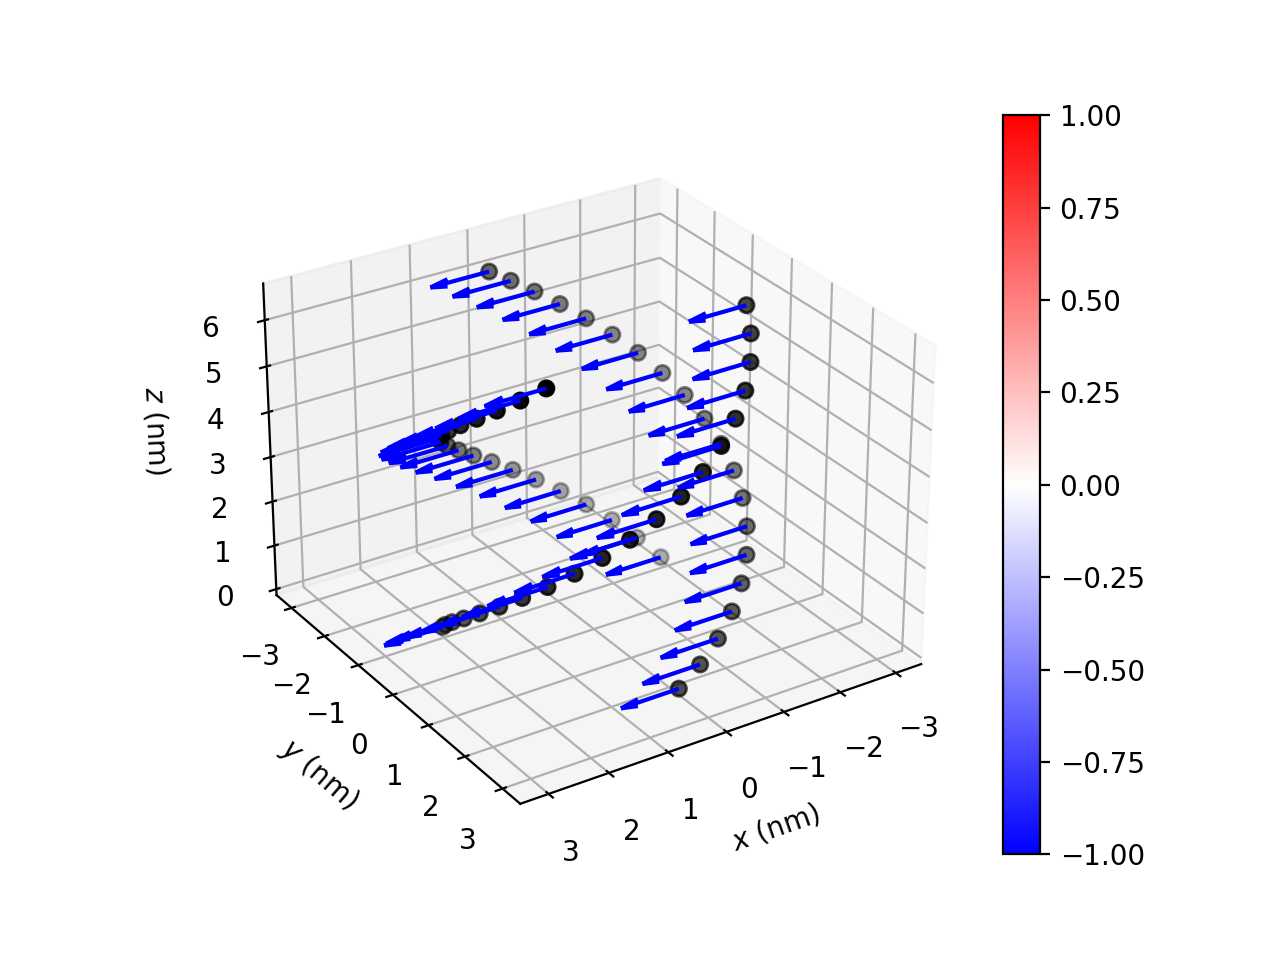

In [3]:
SAV = False
title = f'M_Bext_z_{NN}_monomers'
print(title)
plot_res(p,m1_z/muB,title,SAV);
title = title[:7] + 'x' + title[8:]
print(title)
plot_res(p,m1_x/muB,title,SAV);



Plot Dipolar Fields $\left(B_{total} - B_{external}\right)$

B_dipolar_Bext_z_20_monomers


<IPython.core.display.Javascript object>


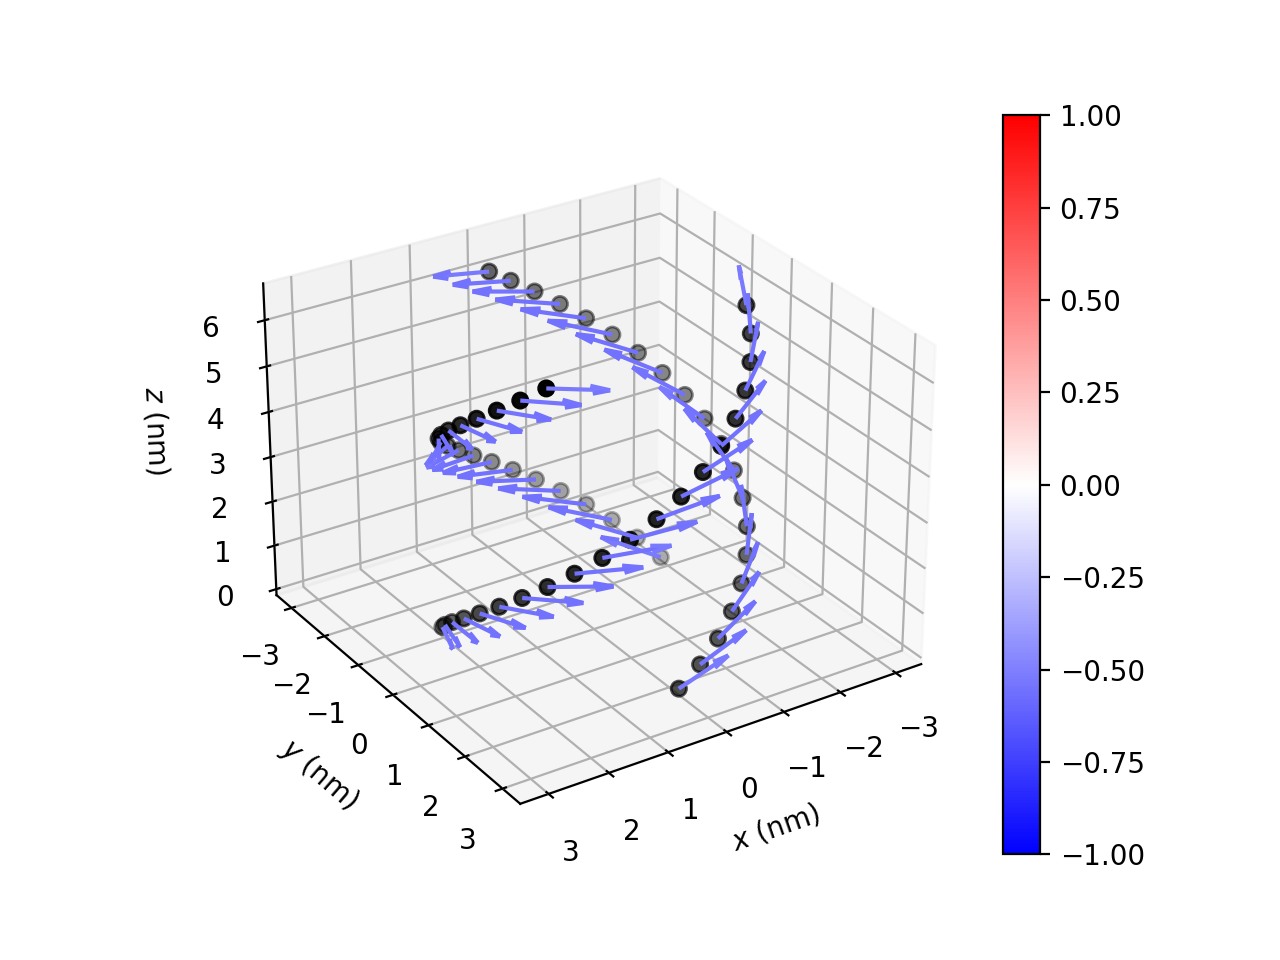

B_dipolar_Bext_z_20_monomers


<IPython.core.display.Javascript object>


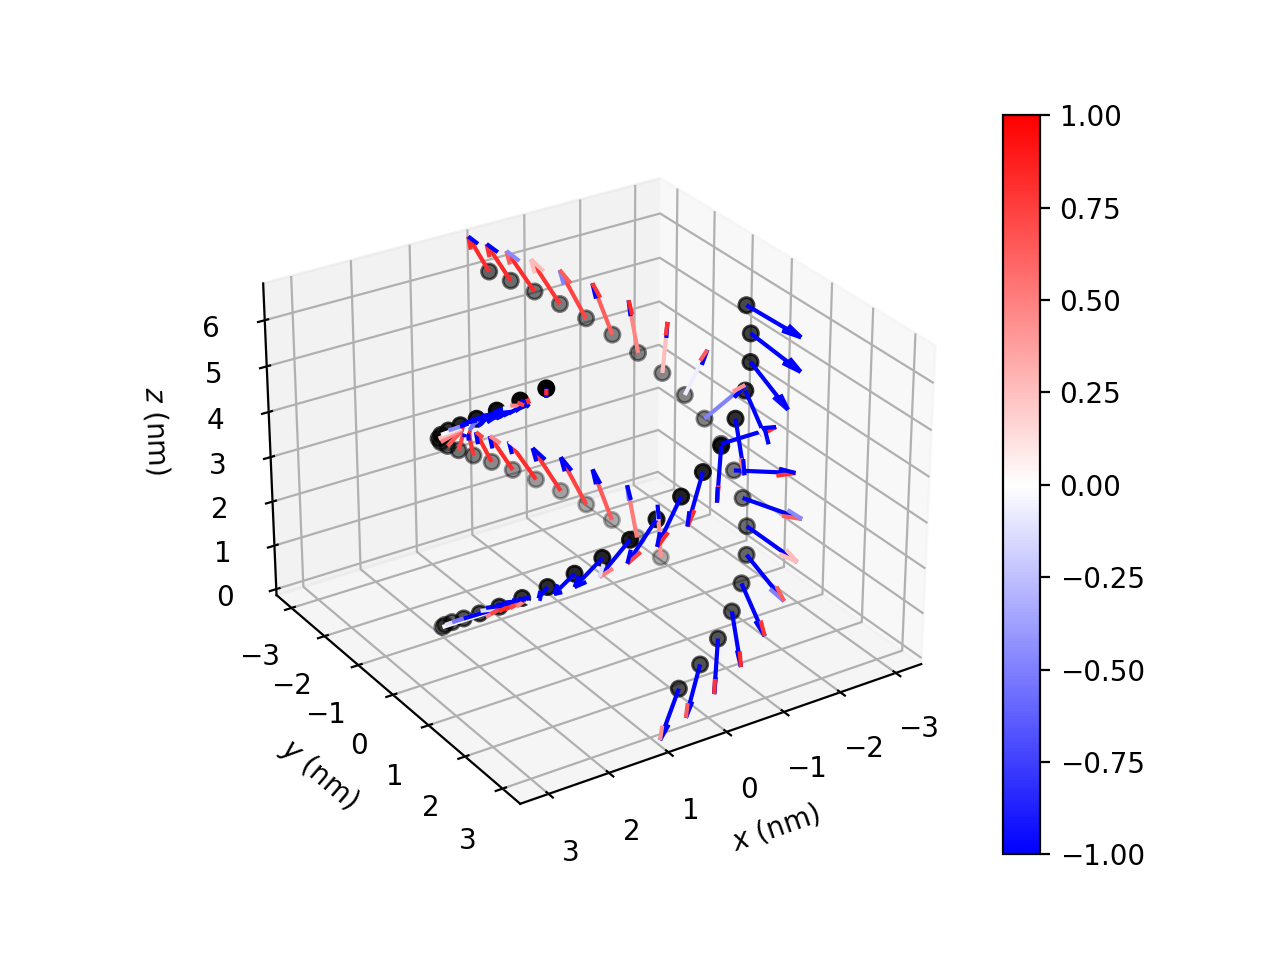

In [5]:
SAV = False
title = f'B_dipolar_Bext_z_{NN}_monomers'
print(title)
plot_res(p,Bdip_z,title,SAV)
print(title)
title = title[:15] + 'x' + title[16:]
plot_res(p,Bdip_x,title,SAV)

Plot distribution of dipolar fields

B_dist_z_20_monomers


<IPython.core.display.Javascript object>


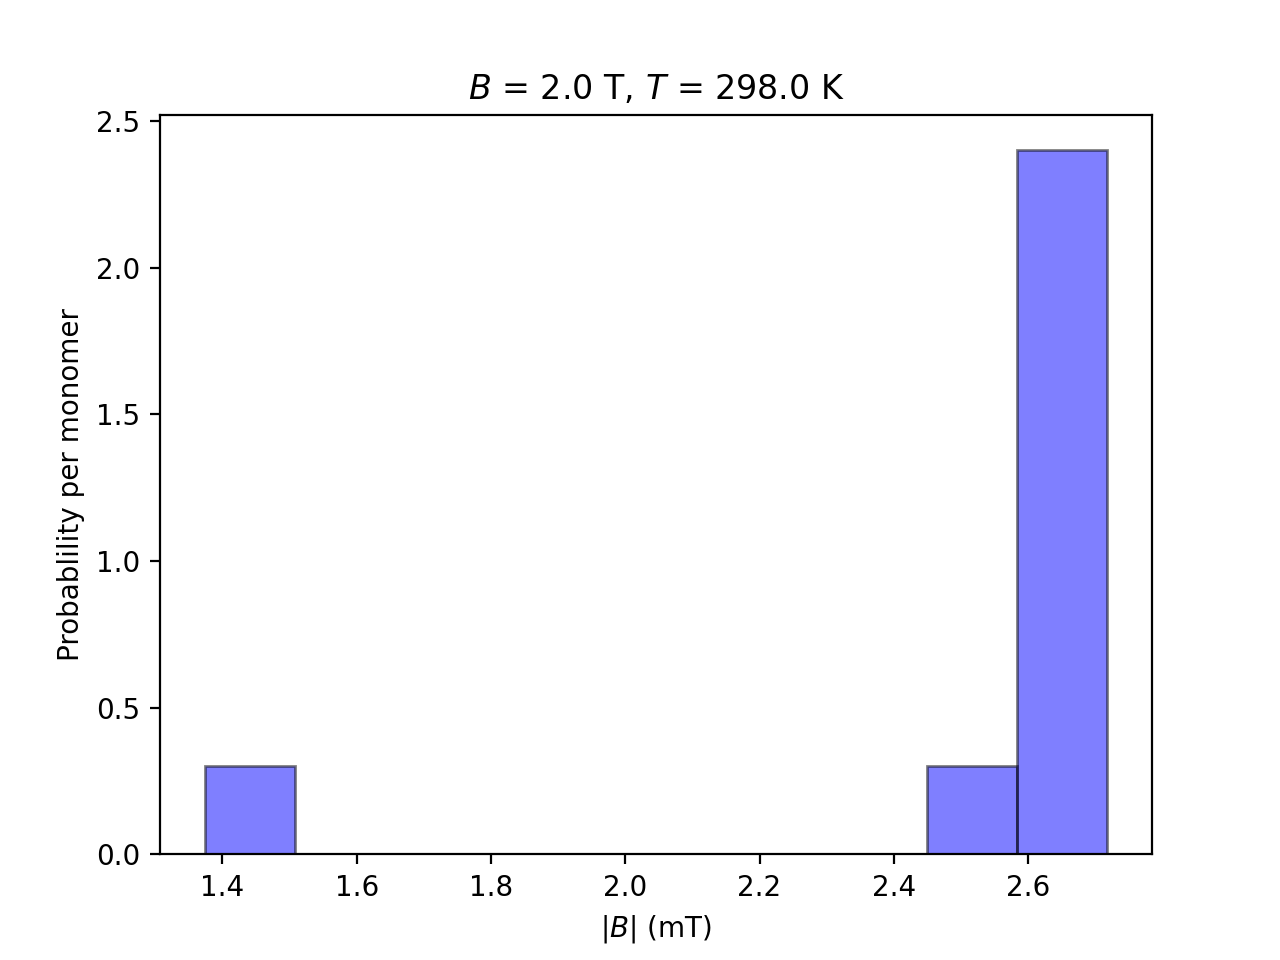

B_dist_x_20_monomers


<IPython.core.display.Javascript object>


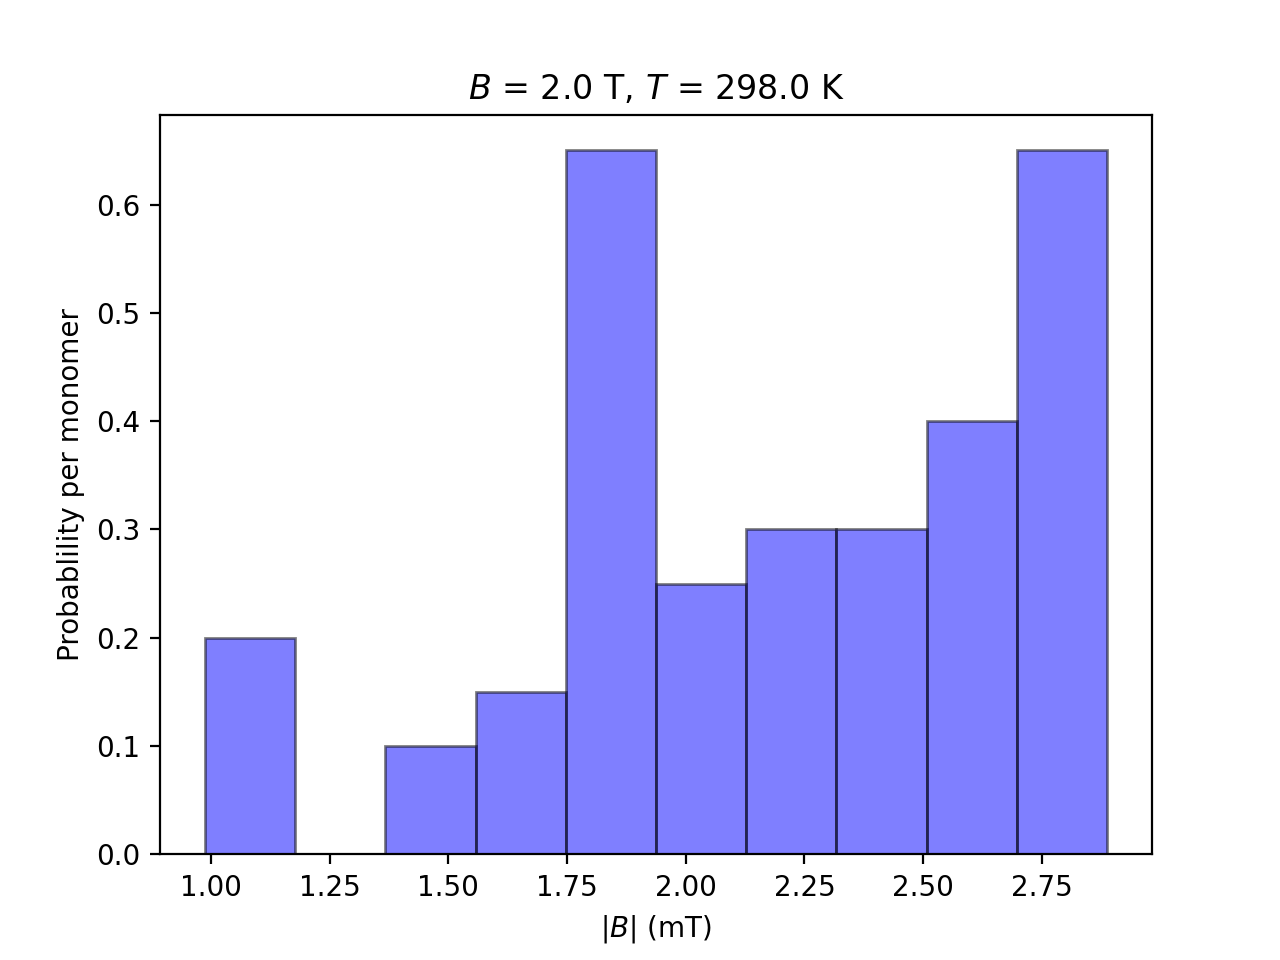

In [6]:
SAV = False
num_bins = 10
filenm = f'B_dist_z_{NN}_monomers'
file_type = 'pdf'
print(filenm)

# plot_dipolar_field_distn(Bn_z, Bn_x, Bmag, T, filenm, file_type, num_bins, SAV)
plot_dipolar_field_distn(Bn_z, Bmag, T, filenm, file_type, num_bins, SAV)

filenm = f'B_dist_x_{NN}_monomers'
print(filenm)

plot_dipolar_field_distn(Bn_x, Bmag, T, filenm, file_type, num_bins, SAV)


Average Magnetisation for $B_z$,and $\mu_0 M_z / B_{ext}$ (%)

In [7]:
print(f'{np.linalg.norm(Mag_z):0.1f} A/m')
print(f'{(np.linalg.norm(Mag_z)*u0) * 100 /Bmag:0.2f} (%)')

595.1 A/m
0.04 (%)


Average Magnetisation for $B_x$ and $\mu_0 M_x / B_{ext}$ (%)

In [8]:
print(f'{np.linalg.norm(Mag_x):0.1f} A/m')
print(f'{(np.linalg.norm(Mag_x)*u0) * 100 /Bmag:0.2f} (%)')

594.8 A/m
0.04 (%)


Relative magnetisation difference $\frac{M_z - Mx}{M_z}$ (%)

In [9]:
dM = (np.linalg.norm(Mag_z) - np.linalg.norm(Mag_x))*100/np.linalg.norm(Mag_z)
print(f'{dM:0.2f} (%)')

0.04 (%)


Volume of assembly containing 100 monomers and No. Gd atoms per nm$^3$

In [10]:
NN = 100
r = 2.25e-9
d = 0.35e-9
vol = np.pi*r**2 * NN*d
print(f'Volume of 100 monomers = {vol*1e9**3:0.0f} nm3')
Nd = NN*3/vol/1e9**3
print(f'{Nd:0.2f} Gd per nm3')


Volume of 100 monomers = 557 nm3
0.54 Gd per nm3


Estimate of magnetisation assuming fully aligned dipoles

In [11]:
m_atom = 8.9 
B = 2
T = 298
S = 7/2
L = 0
J = L+S
# mB = brill_func(L, S, m_atom, B, T)
# print(mB*100/muB/m_atom)

meff = curie_prefac(m_atom,T)*B
print(f'meff = {meff/muB:0.2f} µB')
print(f'M = {meff*Nd*1e27:0.1f} A/m')


meff = 0.12 µB
M = 594.9 A/m


Shape Anisotropy of rods used in the experiments

In [12]:
kB * 298/ k_sh(600,0)

3.63786998032046e-20

In [13]:
L = 245e-9
r = 2.25e-9
vol = np.pi*r**2 * L
print(f'Volume {vol/1e-9**3:1.0f} nm3')

Volume 3897 nm3


Table of Shape Anisotropy for B applied parallel and perpendicular

In [15]:
L = 245e-9
vol = np.pi*r**2 * L

k_par = k_sh(595.1,0)
k_perp = k_sh(594.8,1/2)
print(f'k_par \t k_perp\t dk \t Units')

print(f'{k_par*1e3:0.0f} \t {k_perp*1e3:0.1f} \t {(k_par - k_perp)*1e3:0.1f} \t mJ/m3')
print(f'{k_par*vol*1e25:0.1f} \t {k_perp*vol*1e25:0.1f} \t {(k_par - k_perp)*vol*1e25:0.1f} \t 1e-25 J')
print(f'{k_par*vol/kB:0.2f} \t {k_perp*vol/kB:0.2f} \t {(k_par - k_perp)*vol/kB:0.2f} \t K')
print(f'{k_par*vol*1e5/kB/T:0.1f} \t {k_perp*vol*1e5/kB/T:0.1f} \t {(k_par - k_perp)*vol*1e5/kB/T:0.1f} \t 1e-5')


k_par 	 k_perp	 dk 	 Units
111 	 -55.6 	 166.8 	 mJ/m3
4.3 	 -2.2 	 6.5 	 1e-25 J
0.03 	 -0.02 	 0.05 	 K
10.5 	 -5.3 	 15.8 	 1e-5


In [16]:
kB * 298 /(k_par - k_perp) / vol

6329.121975081089

In [17]:
T = 298
B = 2
#
mB = brill_func(L, S, m_atom, B, T)
# mB = curie_prefac(m_atom,T)*B
meff = mB/muB
Umono = calc_Um(meff,B)
M_assem = np.round(mB*.54e27)
e_par = k_sh(M_assem,0)*vol
frac_rod = -0.02*Umono/e_par

print(f'meff = {meff:0.2f} µB')
print(f'Umono = {Umono:0.2e} J, or {Umono*Na:0.2f} J/mol')
print(f'e_par = {e_par:0.2e} J, or {e_par*Na:0.2f} J/mol')
print(f'No. of monomners in assembled rods = {frac_rod*100:0.1f} %')

meff = 0.12 µB
Umono = -3.35e-24 J, or -2.02 J/mol
e_par = 4.45e-25 J, or 0.27 J/mol
No. of monomners in assembled rods = 15.0 %


### Low Temperatures
An example of using a Brillouin function at low temperature

Applied Field:
 [x	 y	 z] T 
 [7.0000000e+00 0.0000000e+00 4.2862638e-16]
### Self-consistent calculation completed in 49 loops ###
dM error is 8.75e-11
M = 43139.2 (A/m) 	 <Bdip> = 174.41 (mT)
-20255.14 J/mol/assem -506.38 J/mol/mono 40 monomers 14.00 nm 



/Users/peter/Documents/4months/python/mag_self_assembly/notebooks/self_consistent.py:353: RuntimeWarning: divide by zero encountered in true_divide
  out = muB * m_atom * ((j1 / np.tanh(j1 * xB)) - (j2 / np.tanh(j2 * xB)))
/Users/peter/Documents/4months/python/mag_self_assembly/notebooks/self_consistent.py:353: RuntimeWarning: invalid value encountered in subtract
  out = muB * m_atom * ((j1 / np.tanh(j1 * xB)) - (j2 / np.tanh(j2 * xB)))


<IPython.core.display.Javascript object>


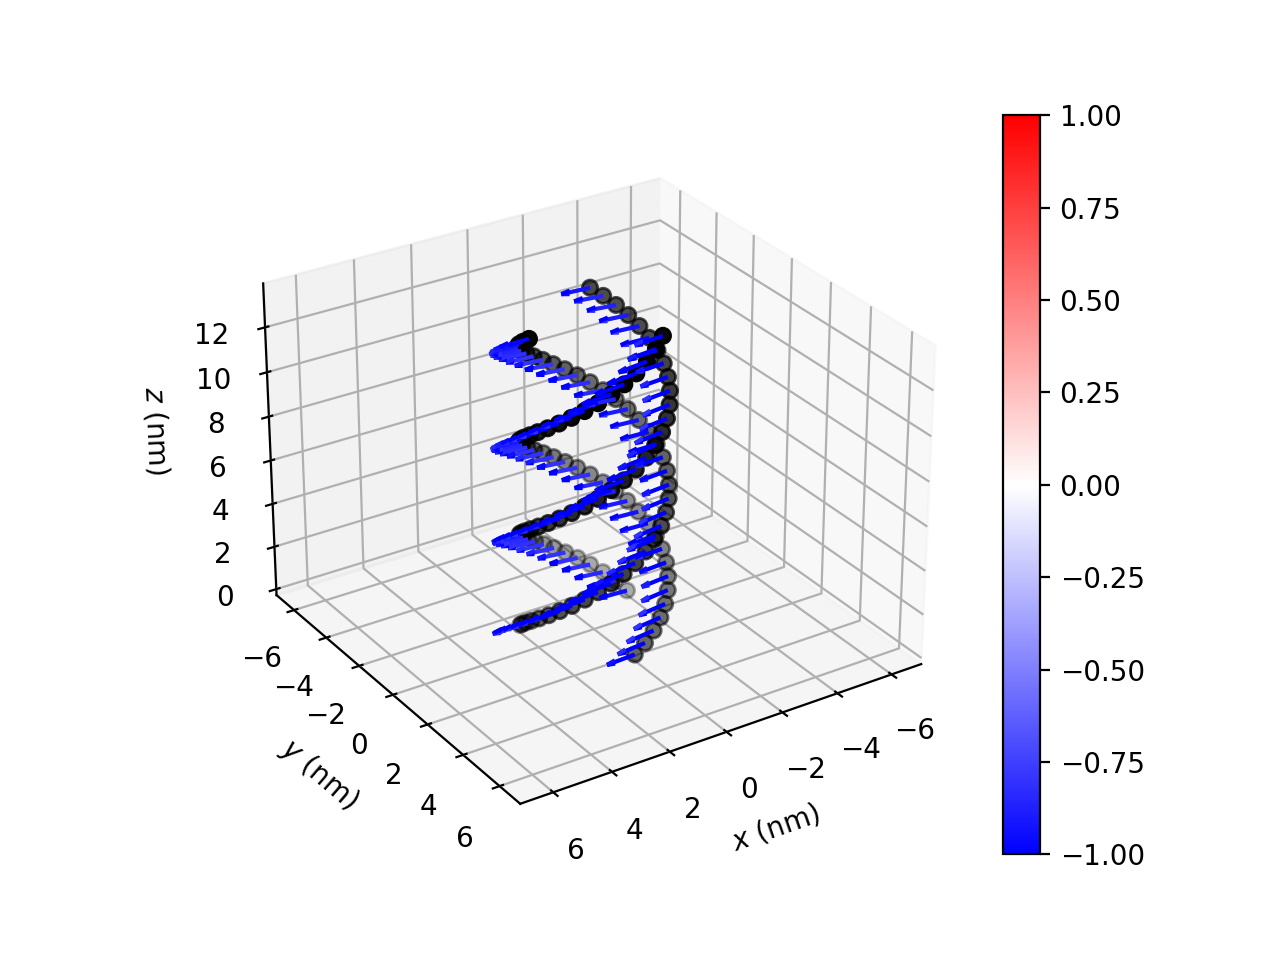

<IPython.core.display.Javascript object>


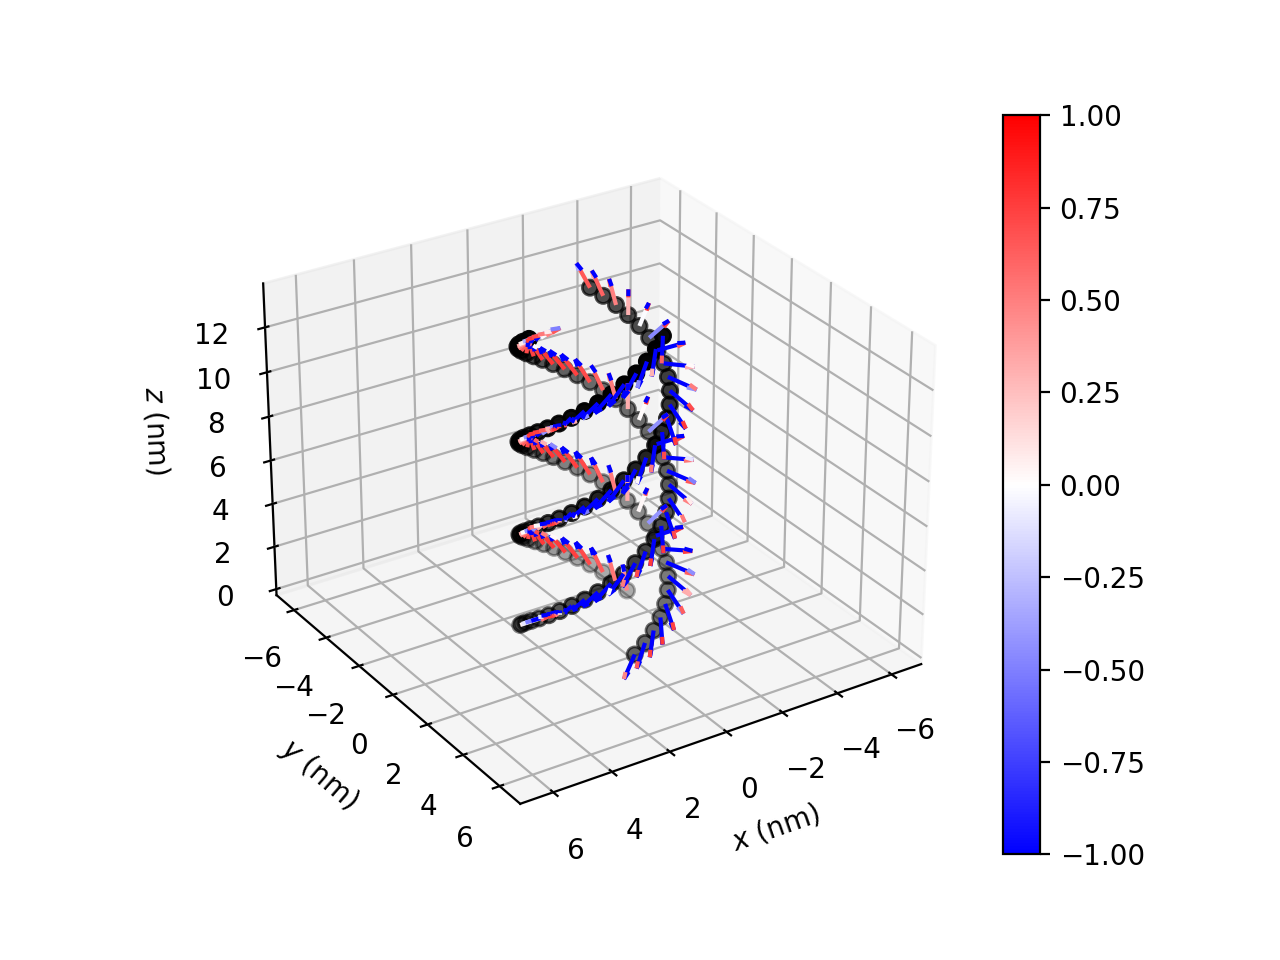

<IPython.core.display.Javascript object>


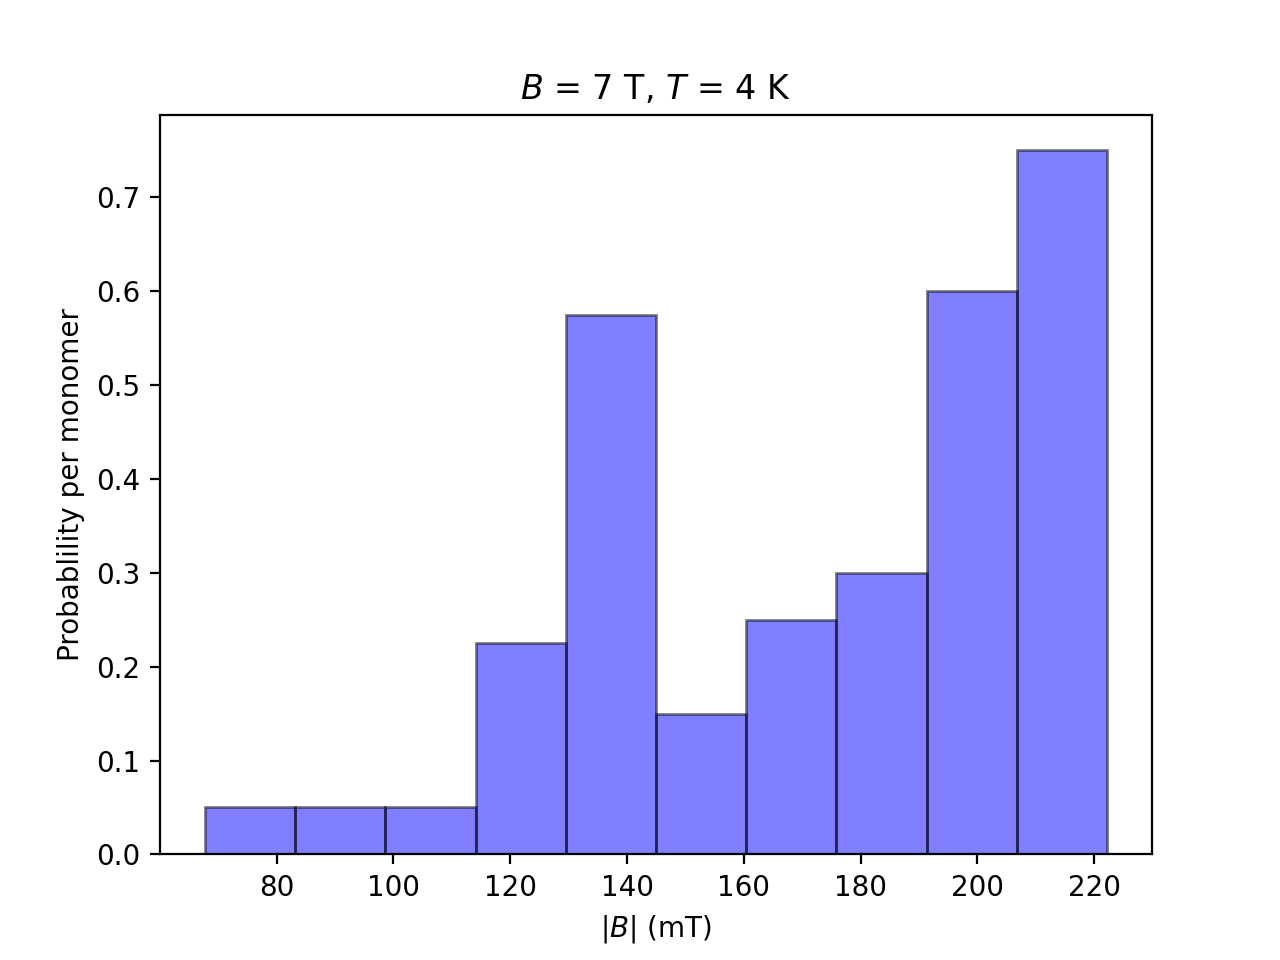

In [18]:
Bmag = 7
NN = 40
T = 4
p,m1,Bdip,Mag,Ut,vol = main_calc(Bmag, theta=90, phi = 0, NN=NN, T = T, print_res = True, mode = 'Brillouin')
Bn = np.linalg.norm(Bdip, ord=2, axis=1)

SAV = False
title = f'M_Bext_{NN}_monomers'
plot_res(p,m1/muB,title,SAV);
title = f'B_dipolar_Bext_{NN}_monomers'
plot_res(p,Bdip,title,SAV)

num_bins = 10
filenm = f'B_dist_{NN}_monomers'
file_type = 'pdf'
plot_dipolar_field_distn(Bn, Bmag, T, filenm, file_type, num_bins, SAV)


### Angular dependence 
at B = 2 T, T = 298 K

#### Contour Plots

In [19]:
SAV = False
Bmag = 2
NN = 40
T = 298

NP = 46
NPJ = NP*1j
theta, phi = np.mgrid[-90:90:NPJ, -90:90:NPJ]

tp = theta.flatten()
pp = phi.flatten()

# theta = np.linspace(0,90,101)
# phi = np.linspace(0,120,101)
U_arr = np.zeros_like(tp)
M_arr = np.zeros_like(tp)
B_arr = np.zeros_like(tp)

# i = 0
for i in range(len(tp)):
    p,m1,Bdip,Mag,Ut,vol = main_calc(Bmag, theta=tp[i], phi = pp[i], NN=NN, T = T)
    Bn = np.linalg.norm(Bdip, ord=2, axis=1)
    U_arr[i] = Ut
    M_arr[i] = np.linalg.norm(Mag)
    B_arr[i] = np.mean(Bn)
#     i += 1
U_arr = U_arr.reshape(theta.shape)
M_arr = M_arr.reshape(theta.shape)
B_arr = B_arr.reshape(theta.shape)

In [20]:
SAV = False
cb_label = '$U_m$ (J m$^{-3}$)'
array = U_arr/vol
filenm = f'contour_Um_{NN}_monomers'

plot_angular_contour(array, theta, phi, cb_label, filenm = filenm, file_type='png', SAV = SAV)

filenm = f'contour_Mavg_{NN}_monomers'
cb_label = '$<\mathbf{M}>$ (A m$^{-1}$)'
array = M_arr
plot_angular_contour(array, theta, phi, cb_label, filenm = filenm, file_type='png', SAV = SAV)

filenm = f'contour_Bdip_{NN}_monomers'
cb_label = '$<\mathbf{B_{dip}}>$ (mT)'
array = B_arr*1e3
plot_angular_contour(array, theta, phi, cb_label, filenm = filenm, file_type='png', SAV = SAV)

TypeError: plot_angular_contour() got an unexpected keyword argument 'SAV'

In [ ]:
Bmag = 2
NN = 40
T = 298
theta = np.linspace(0,90,101)
phi = np.linspace(0,120,101)
U_arr = np.zeros(len(theta))
M_arr = np.zeros([len(theta)])
B_arr = np.zeros([len(theta)])

i = 0
for t in theta:
    p,m1,Bdip,Mag,Ut,vol = main_calc(Bmag, theta=t, phi = 0, NN=NN, T = T)
    Bn = np.linalg.norm(Bdip, ord=2, axis=1)
    U_arr[i] = Ut
    M_arr[i] = np.linalg.norm(Mag)
    B_arr[i] = np.mean(Bn)
    i += 1
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True)

ax1.plot(theta,U_arr/vol)
ax1.set_ylabel(r'$U_m$ (J m$^{-3}$)')

ax2.plot(theta,M_arr)
ax2.set_ylabel(r'$<\mathbf{M}>$ (A m$^{-1}$)')

# fig.set_figwidth(5)
plt.tight_layout()
# fig, ax = plt.subplots()
ax3.plot(theta,B_arr*1e3)
ax3.set_ylabel(r'$<\mathbf{B_{dip}}>$ (mT)')
plt.xlabel(r'$\theta$ ˚')
plt.subplots_adjust(hspace=.1)
plt.show()
filenm = f'angular_theta_{NN}_monomers'
if SAV == 1:
    plt.savefig(filenm + '.png', dpi=150, bbox_inches='tight')
    print('Saving to ' + filenm + '.png')

In [ ]:
Bmag = 2
NN = 40
T = 298
theta = np.linspace(0,90,101)
phi = np.linspace(0,120,101)
U_arr = np.zeros(len(theta))
M_arr = np.zeros([len(theta)])
B_arr = np.zeros([len(theta)])

i = 0
for t in phi:
    p,m1,Bdip,Mag,Ut,vol = main_calc(Bmag, theta=45, phi = t, NN=NN, T = T)
    Bn = np.linalg.norm(Bdip, ord=2, axis=1)
    U_arr[i] = Ut
    M_arr[i] = np.linalg.norm(Mag)
    B_arr[i] = np.mean(Bn)
    i += 1

fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True)

ax1.plot(theta,U_arr/vol)
ax1.set_ylabel(r'$U_m$ (J m$^{-3}$)')

ax2.plot(theta,M_arr)
ax2.set_ylabel(r'$<\mathbf{M}>$ (A m$^{-1}$)')

plt.subplots_adjust(hspace=.2)

plt.tight_layout()
ax3.plot(theta,B_arr*1e3)
ax3.set_ylabel(r'$<\mathbf{B_{dip}}>$ (mT)')
plt.xlabel(r'$\phi$ ˚')
plt.show()
filenm = f'angular_phi_{NN}_monomers'
if SAV == 1:
    plt.savefig(filenm + '.png', dpi=150, bbox_inches='tight')
    print('Saving to ' + filenm + '.png')